# 2014年统计学专业毕业论文分析 

## 获取数据 

- 1.从知网直接导出每篇论文的数据（table1），table1包含作者、题名、导师、文献来源、学位年度、关键词、机构七个维度的信息；

但是table1缺少下载次数、引用次数的信息，且题名中不包含副标题。

![知网导出文献](attachment:image.png "知网导出473篇统计学论文")
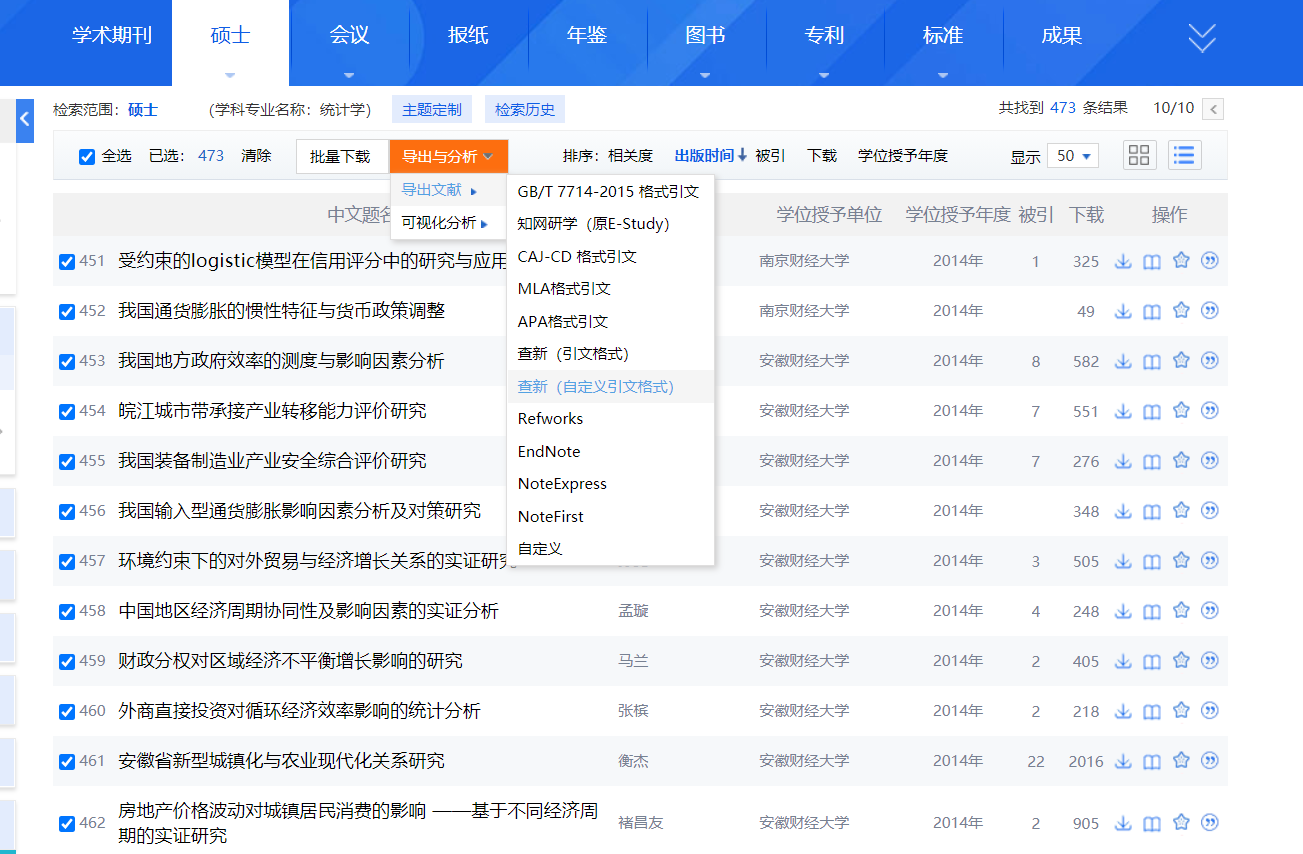

- 自定义引文格式

![image.png](attachment:image.png "七个维度数据")
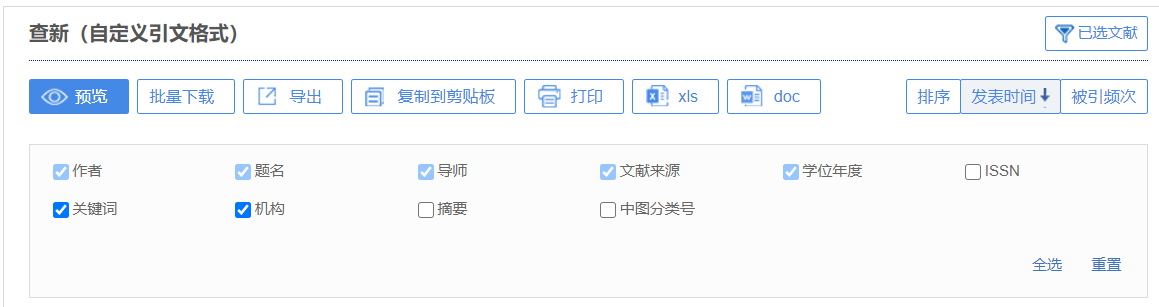

- table1(知网直接导出)

![image.png](attachment:image.png "知网直接导出的数据（不含副标题以及下载和引用次数数据")
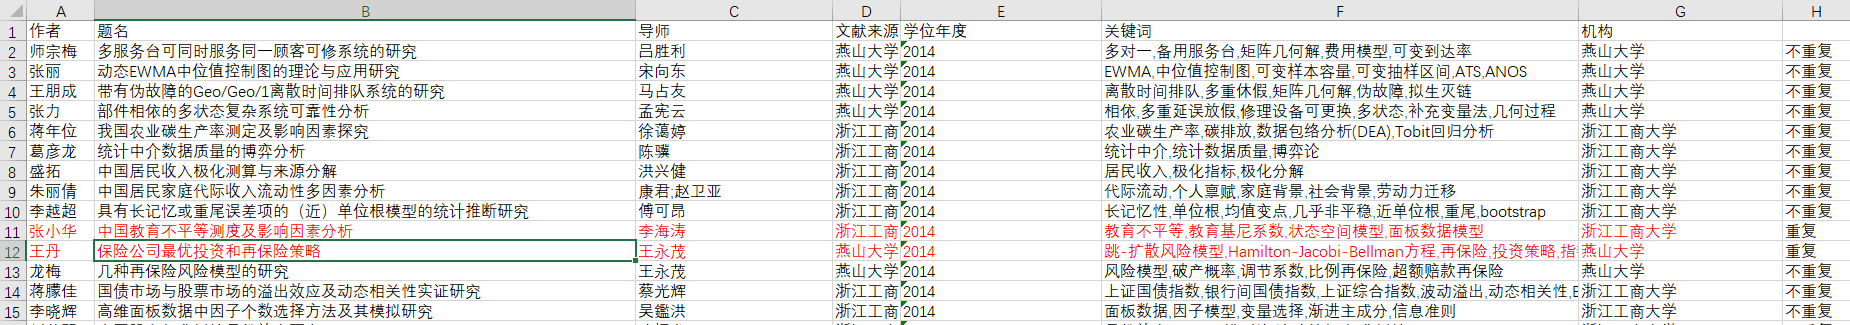

- 2.从页面复制数据，获得table2。

table2包含中文题名、作者、学位授予单位、学位授予年度、**被引（次数）、下载（次数）**六组数据，且table2中的题目名中含有副标题。

但是table2中没有关键词和导师信息。

![image.png](attachment:image.png "获得下载和引用次数")
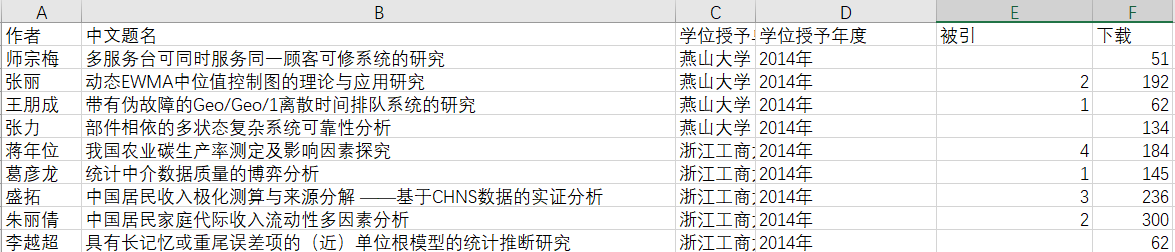

- 3.将table2中的引用次数与下载次数添加到table1中，同时将table1的标题替换为table2的标题（含副标题）。

得到最终要分析的excel文件：

![image.png](attachment:image.png "最终数据")
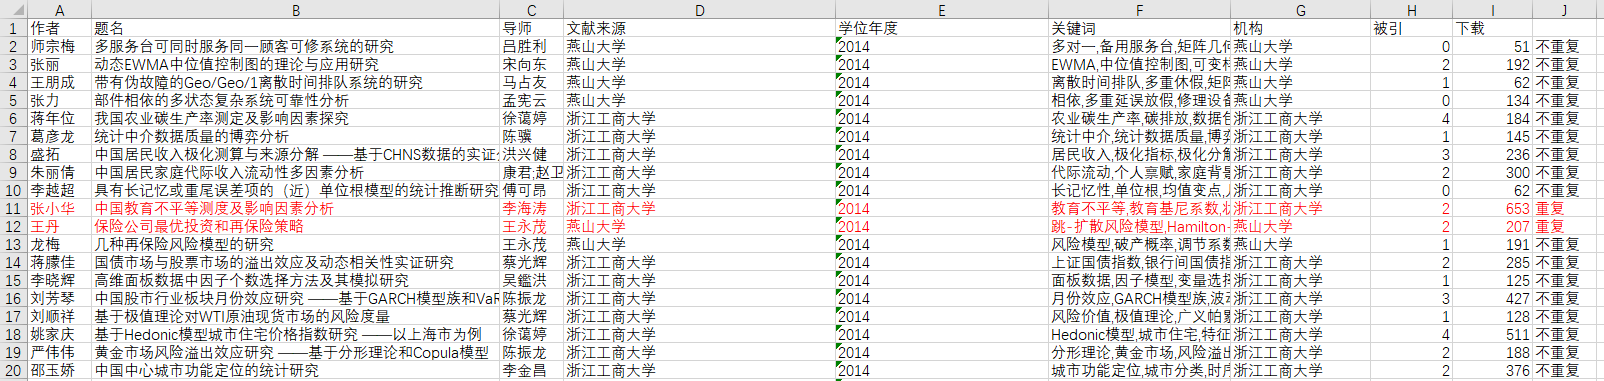

最后获得的表格包含**作者、题名、导师、文献来源、学位年度、关键词、被引(次数)、下载（次数）**八个维度的数据。

## 数据分析

（1）利用pandas导入2014年统计学专业毕业论文数据，分析文献来源以及导师数据。

（2）对下载次数和被引次数做描述性统计，分析两者之间的相关性，利用tensorflow建立下载次数与引用次数的线性回归模型和多层感知机模型。并对给定的引用次数预测其下载次数。

（3）利用jieba分词包对文章题目和论文摘要做文本分析，了解该年度研究最多的内容。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']       # 指定默认字体
df = pd.read_excel(r'D:\datasets\统计案例分析\2014论文.xlsx',header = 0)
df[:10]

e:\software\miniconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  


,作者,题名,导师,文献来源,学位年度,关键词,被引,下载
0,师宗梅,多服务台可同时服务同一顾客可修系统的研究,吕胜利,燕山大学,2014,"多对一,备用服务台,矩阵几何解,费用模型,可变到达率",0,51
1,张丽,动态EWMA中位值控制图的理论与应用研究,宋向东,燕山大学,2014,"EWMA,中位值控制图,可变样本容量,可变抽样区间,ATS,ANOS",2,192
2,王朋成,带有伪故障的Geo/Geo/1离散时间排队系统的研究,马占友,燕山大学,2014,"离散时间排队,多重休假,矩阵几何解,伪故障,拟生灭链",1,62
3,张力,部件相依的多状态复杂系统可靠性分析,孟宪云,燕山大学,2014,"相依,多重延误放假,修理设备可更换,多状态,补充变量法,几何过程",0,134
4,蒋年位,我国农业碳生产率测定及影响因素探究,徐蔼婷,浙江工商大学,2014,"农业碳生产率,碳排放,数据包络分析(DEA),Tobit回归分析",4,184
5,葛彦龙,统计中介数据质量的博弈分析,陈骥,浙江工商大学,2014,"统计中介,统计数据质量,博弈论",1,145
6,盛拓,中国居民收入极化测算与来源分解 ——基于CHNS数据的实证分析,洪兴健,浙江工商大学,2014,"居民收入,极化指标,极化分解",3,236
7,朱丽倩,中国居民家庭代际收入流动性多因素分析,康君;赵卫亚,浙江工商大学,2014,"代际流动,个人禀赋,家庭背景,社会背景,劳动力迁移",2,300
8,李越超,具有长记忆或重尾误差项的（近）单位根模型的统计推断研究,傅可昂,浙江工商大学,2014,"长记忆性,单位根,均值变点,几乎非平稳,近单位根,重尾,bootstrap",0,62
9,张小华,中国教育不平等测度及影响因素分析,李海涛,浙江工商大学,2014,"教育不平等,教育基尼系数,状态空间模型,面板数据模型",2,653


In [2]:
df.columns = ["author","title","tutor","source","year","keyword","refernum","downnum"]
df.columns

Index(['author', 'title', 'tutor', 'source', 'year', 'keyword', 'refernum',
       'downnum'],
      dtype='object')

In [3]:
df[:10]

,author,title,tutor,source,year,keyword,refernum,downnum
0,师宗梅,多服务台可同时服务同一顾客可修系统的研究,吕胜利,燕山大学,2014,"多对一,备用服务台,矩阵几何解,费用模型,可变到达率",0,51
1,张丽,动态EWMA中位值控制图的理论与应用研究,宋向东,燕山大学,2014,"EWMA,中位值控制图,可变样本容量,可变抽样区间,ATS,ANOS",2,192
2,王朋成,带有伪故障的Geo/Geo/1离散时间排队系统的研究,马占友,燕山大学,2014,"离散时间排队,多重休假,矩阵几何解,伪故障,拟生灭链",1,62
3,张力,部件相依的多状态复杂系统可靠性分析,孟宪云,燕山大学,2014,"相依,多重延误放假,修理设备可更换,多状态,补充变量法,几何过程",0,134
4,蒋年位,我国农业碳生产率测定及影响因素探究,徐蔼婷,浙江工商大学,2014,"农业碳生产率,碳排放,数据包络分析(DEA),Tobit回归分析",4,184
5,葛彦龙,统计中介数据质量的博弈分析,陈骥,浙江工商大学,2014,"统计中介,统计数据质量,博弈论",1,145
6,盛拓,中国居民收入极化测算与来源分解 ——基于CHNS数据的实证分析,洪兴健,浙江工商大学,2014,"居民收入,极化指标,极化分解",3,236
7,朱丽倩,中国居民家庭代际收入流动性多因素分析,康君;赵卫亚,浙江工商大学,2014,"代际流动,个人禀赋,家庭背景,社会背景,劳动力迁移",2,300
8,李越超,具有长记忆或重尾误差项的（近）单位根模型的统计推断研究,傅可昂,浙江工商大学,2014,"长记忆性,单位根,均值变点,几乎非平稳,近单位根,重尾,bootstrap",0,62
9,张小华,中国教育不平等测度及影响因素分析,李海涛,浙江工商大学,2014,"教育不平等,教育基尼系数,状态空间模型,面板数据模型",2,653


### 文献来源

In [4]:
source_count = df["source"].value_counts()
source_count                                                                             #一个series对象

天津财经大学        49
西南财经大学        35
浙江工商大学        34
厦门大学          27
首都经济贸易大学      23
河北大学          18
湖南大学          16
江西财经大学        15
安徽财经大学        15
兰州商学院         14
云南财经大学        14
重庆工商大学        13
南京财经大学        11
山东财经大学        11
杭州电子科技大学      11
福州大学          10
辽宁大学          10
石河子大学         10
河北经贸大学        10
新疆财经大学         9
浙江大学           9
山西财经大学         9
暨南大学           7
广东财经大学         7
内蒙古财经大学        7
东北林业大学         6
北京林业大学         6
贵州财经大学         6
北京交通大学         6
燕山大学           6
吉林财经大学         5
西安财经学院         5
西北师范大学         5
天津职业技术师范大学     4
福建农林大学         3
湖南师范大学         3
桂林理工大学         3
华东交通大学         3
哈尔滨商业大学        3
南京航空航天大学       2
中国科学技术大学       2
华中师范大学         2
河南大学           2
东北师范大学         1
天津大学           1
河南财经政法大学       1
华北电力大学         1
武汉理工大学         1
清华大学           1
陕西师范大学         1
Name: source, dtype: int64

- 绘制条形图

In [5]:
x_axis = source_count.index                                                               #获取source_count中的索引        
len(x_axis)

50

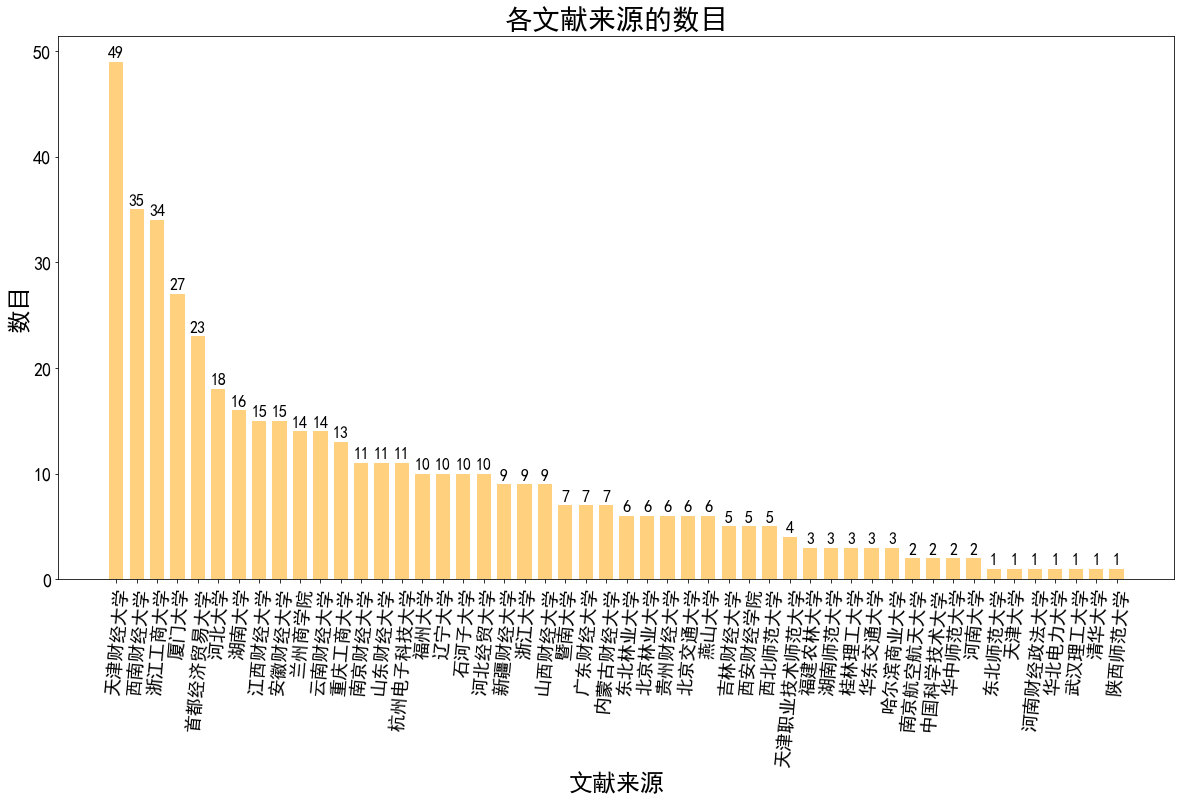

In [6]:
source_num = source_count.values                                                           #获取source_count中的值
x_label = x_axis                                                 
x_var = np.arange(len(x_axis))

fig = plt.figure()                                        
fig.set_size_inches(20,10)                                                                 #设置画布大小                                                                                    

plt.title("各文献来源的数目",fontsize=28)                                       
plt.xlabel("文献来源", fontsize = 24)                                           
plt.ylabel("数目",fontsize = 24)
plt.xticks(x_var, x_label, rotation = 85, fontsize = 18)                                   #刻度、标签、字体旋转、字体大小
plt.yticks(fontsize = 18)
plt.bar(x_var,source_num, width = 0.7,align = 'center',color="orange", alpha=0.5)         #绘制文献来源的条形图

for a,b in zip(x_var,source_num): 
 plt.text(a, b+0.2, '%.0f' % b, ha='center', va= 'bottom',fontsize=16)                     #使用text显示数值

plt.show()

## 导师指导学生的数目 

In [7]:
tutor_count = df["tutor"].value_counts()
tutor_count

李保坤    5
李腊生    5
马薇     5
白仲林    4
杨贵军    4
      ..
庞新生    1
洪兴健    1
吴昊     1
高萍     1
刘建平    1
Name: tutor, Length: 307, dtype: int64

In [8]:
student_num = tutor_count.values
student_num                                                                #array对象

array([5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
from collections import Counter        #计数器 用于计数hashable项的Dict子类。元素存储为字典键,其计数作为字典值存储
stnum_type = Counter(student_num)
stnum_type

Counter({5: 3, 4: 8, 3: 30, 2: 70, 1: 196})

<BarContainer object of 5 artists>

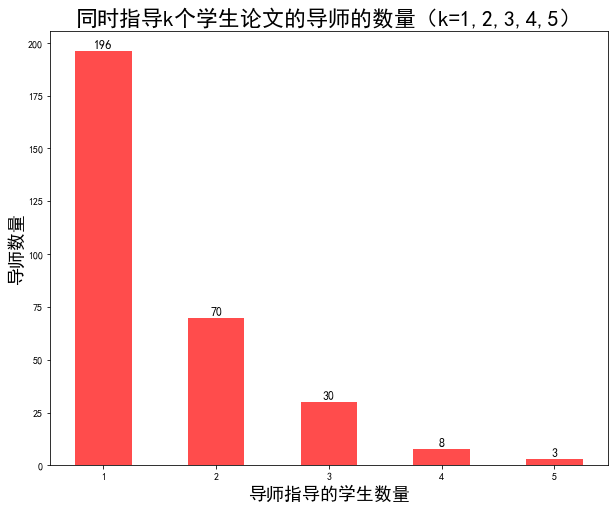

In [10]:
fig = plt.figure()
fig.set_size_inches(10,8)
x  = stnum_type.keys()
y = stnum_type.values()

plt.title("同时指导k个学生论文的导师的数量（k=1,2,3,4,5）",fontsize=22)                                       
plt.xlabel("导师指导的学生数量", fontsize = 18)                                           
plt.ylabel("导师数量",fontsize =18)

for a,b in zip(x,y): 
 plt.text(a, b+0.2, '%.0f' % b, ha='center', va= 'bottom',fontsize=12)                      #使用text显示数值

# ax = fig.add.subplot(1,1)
plt.bar(x,y,width=0.5,color='r',alpha=0.7)

# 被引次数与被下载次数 

## 被引次数 

- 描述性统计信息

In [11]:
df['refernum'].describe()

count    473.000000
mean       3.395349
std        4.340163
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       35.000000
Name: refernum, dtype: float64

In [12]:
refer_num = df['refernum'].value_counts()
refer_num

0     107
1      85
2      69
3      56
4      40
5      26
6      22
7      17
10     13
9       6
8       5
11      4
13      4
18      3
12      3
15      2
14      2
22      2
16      1
17      1
19      1
20      1
23      1
32      1
35      1
Name: refernum, dtype: int64

In [13]:
refer_num[0]

107

In [14]:
len(refer_num)

25

- 按index排序

Series的按索引排序和按值排序。

分别使用s1.sort_index()和s1.sort_values()对s1按索引和值进行排序。

In [15]:
s1 = refer_num.sort_index(ascending = True)
s1

0     107
1      85
2      69
3      56
4      40
5      26
6      22
7      17
8       5
9       6
10     13
11      4
12      3
13      4
14      2
15      2
16      1
17      1
18      3
19      1
20      1
22      2
23      1
32      1
35      1
Name: refernum, dtype: int64

In [16]:
sum1 = sum(s1[0:6])                                                    #被引次数在0-5(含5次)次的文章数目
sum1

383

In [17]:
print(f"被引次数在0-5次（包含5次）的论文占论文总数的{sum1/473*100}%")

被引次数在0-5次（包含5次）的论文占论文总数的80.97251585623678%


In [18]:
sum2 = sum(s1[10:])                                                     #被引次数在10次以上（含10次）的文章数目
sum2

40

In [19]:
print(f"被引次数在10次以上（包含10次）的论文占论文总数的{sum2/473*100}%")

被引次数在10次以上（包含10次）的论文占论文总数的8.456659619450317%


In [20]:
# refer_num[35]

In [21]:
# sum(refer_num[20:25])

In [22]:
y = list(np.zeros(6))
#标签索引方式和位置索引方式 loc:通过标签索引访问   iloc:仅通过位置进行访问
y[0] = sum(s1.iloc[0:3])                   #被引次数0-2
y[1] = sum(s1.iloc[3:6])                   #被引次数3-5
y[2] = sum(s1.iloc[6:11])                  #被引次数6-10
y[3] = sum(s1.iloc[11:20])                 #被引次数11-19
y[4] = sum(s1.iloc[20:23])                 #被引次数20-29
y[5] = sum(s1.iloc[23:25])                 #被引次数不少于30次                                    
y

[261, 122, 63, 21, 4, 2]

In [23]:
sum(y)

473

In [24]:
x = ['0-2','3-5','6-10','11-19','21-29','30+']
x

['0-2', '3-5', '6-10', '11-19', '21-29', '30+']

#### 被引次数的柱状图 

<BarContainer object of 6 artists>

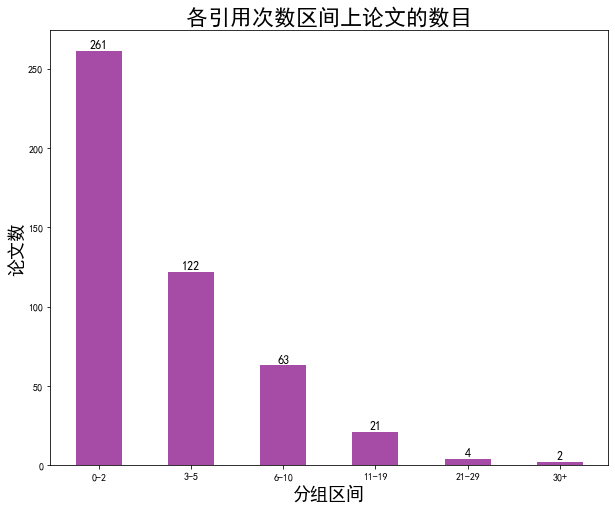

In [25]:
fig = plt.figure()
fig.set_size_inches(10,8)

plt.title("各引用次数区间上论文的数目",fontsize=22)                                       
plt.xlabel("分组区间", fontsize = 18)                                           
plt.ylabel("论文数",fontsize =18)

for a,b in zip(x,y): 
 plt.text(a, b+0.2, '%.0f' % b, ha='center', va= 'bottom',fontsize=12)                      #使用text显示数值

# ax = fig.add.subplot(1,1)
plt.bar(x,y,width=0.5,color='purple',alpha=0.7)

## 被下载次数 

In [26]:
df['downnum'].describe()

count     473.000000
mean      438.236786
std       479.185731
min         6.000000
25%       158.000000
50%       291.000000
75%       523.000000
max      4277.000000
Name: downnum, dtype: float64

In [27]:
download_num = df['downnum'].value_counts()
download_num

195     4
84      4
335     3
20      3
176     3
       ..
177     1
686     1
685     1
1823    1
511     1
Name: downnum, Length: 371, dtype: int64

In [28]:
s2 = download_num.sort_index(ascending = True)

In [29]:
s2

6       1
9       1
20      3
26      1
35      1
       ..
2382    1
2727    1
3314    1
3315    1
4277    1
Name: downnum, Length: 371, dtype: int64

In [30]:
s2_index = s2.index
s2_index

Int64Index([   6,    9,   20,   26,   35,   39,   41,   42,   43,   44,
            ...
            1973, 1986, 1990, 2016, 2047, 2382, 2727, 3314, 3315, 4277],
           dtype='int64', length=371)

In [31]:
sum1 = sum(s2[s2_index < 100])
print(sum1)                                  #下载次数在1-99次的论文数
sum2 = sum(s2[s2_index >= 100])
print(sum2)                                  
sum3 = sum(s2[s2_index >= 500])
print(sum3)                                  #下载次数不少于500次的论文数
sum4 = sum(s2[s2_index >= 1000])
print(sum4)                                  
sum5 = sum(s2[s2_index >= 2000])
print(sum5)                                  
sum6 = sum(s2[s2_index >= 3000])
print(sum6)                                 

59
414
128
40
7
3


In [32]:
y1 = list(np.zeros(6))
y1[0] = sum1                           #下载次数1-99
y1[1] = sum2 - sum3                  #下载次数100-499
y1[2] = sum3 - sum4                 #下载次数500-999
y1[3] = sum4 - sum5                 #下载次数1000-1999
y1[4] = sum5 - sum6                 #下载次数2000-2999
y1[5] = sum6                        #下载次数不少于3000次                                    
y1

[59, 286, 88, 33, 4, 3]

In [33]:
x1 = ['1-99','100-499','500-999','1000-1999','2000-2999','3000+']
x1

['1-99', '100-499', '500-999', '1000-1999', '2000-2999', '3000+']

#### 下载次数的柱状图 

<BarContainer object of 6 artists>

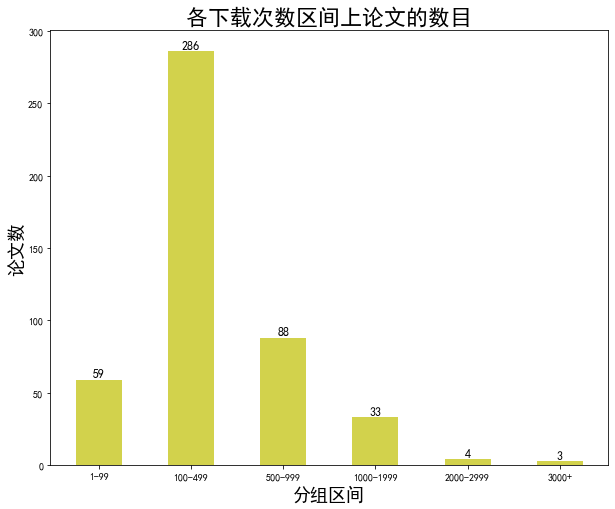

In [34]:
fig = plt.figure()
fig.set_size_inches(10,8)

plt.title("各下载次数区间上论文的数目",fontsize=22)                                       
plt.xlabel("分组区间", fontsize = 18)                                           
plt.ylabel("论文数",fontsize =18)

for a,b in zip(x1,y1): 
 plt.text(a, b+0.2, '%.0f' % b, ha='center', va= 'bottom',fontsize=12)                      #使用text显示数值

# ax = fig.add.subplot(1,1)
plt.bar(x1,y1,width=0.5,color='y',alpha=0.7)

### 下载次数与引用次数之间的关系 

In [35]:
rd_corr = df['refernum'].corr(df['downnum'])
rd_corr                                              #下载次数与引用次数的相关系数

0.6907046211611645

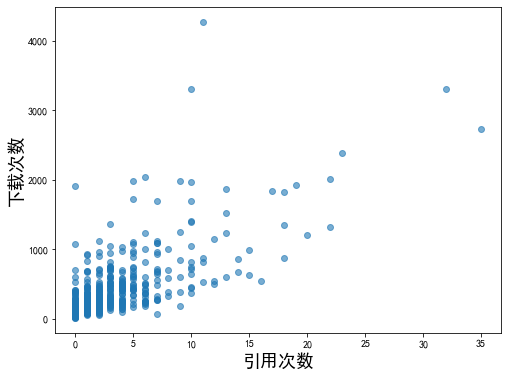

In [36]:
fig = plt.figure()
fig.set_size_inches(8,6)                                                      #设置画布大小                                                                                    

ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel("引用次数",fontsize = 18)
ax1.set_ylabel("下载次数",fontsize = 18)
ax1.scatter(df.refernum,df.downnum,alpha=0.6)

#### 线性回归

In [37]:
import tensorflow as tf
x2 = df['refernum'].values
y2 = df['downnum'].values

In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))                #ax+b
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer = 'Adam',
             loss = 'mse',
)

In [40]:
history = model.fit(x2,y2,epochs=1000)

Epoch 1/1000
15/15 [==============================] - 0s 3ms/step - loss: 426240.8750
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 426147.5938
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 426056.2812
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 425966.1875
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 425875.2812
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 425783.7500
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 425695.3125
Epoch 8/1000
15/15 [==============================] - 0s 2ms/step - loss: 425600.3750
Epoch 9/1000
15/15 [==============================] - 0s 2ms/step - loss: 425509.9688
Epoch 10/1000
15/15 [==============================] - 0s 2ms/step - loss: 425421.8750
Epoch 11/1000
15/15 [==============================] - 0s 2ms/step - loss: 425327.1562
Epoch 12/1000
15/15 [==============================]

Epoch 95/1000
15/15 [==============================] - 0s 4ms/step - loss: 417732.5312
Epoch 96/1000
15/15 [==============================] - 0s 2ms/step - loss: 417640.9688
Epoch 97/1000
15/15 [==============================] - 0s 2ms/step - loss: 417550.6250
Epoch 98/1000
15/15 [==============================] - 0s 3ms/step - loss: 417460.5625
Epoch 99/1000
15/15 [==============================] - 0s 2ms/step - loss: 417371.5938
Epoch 100/1000
15/15 [==============================] - 0s 2ms/step - loss: 417281.0938
Epoch 101/1000
15/15 [==============================] - 0s 2ms/step - loss: 417189.0938
Epoch 102/1000
15/15 [==============================] - 0s 2ms/step - loss: 417096.5312
Epoch 103/1000
15/15 [==============================] - 0s 2ms/step - loss: 417008.1875
Epoch 104/1000
15/15 [==============================] - 0s 2ms/step - loss: 416915.5938
Epoch 105/1000
15/15 [==============================] - 0s 2ms/step - loss: 416827.6562
Epoch 106/1000
15/15 [===============

15/15 [==============================] - 0s 2ms/step - loss: 409544.4375
Epoch 188/1000
15/15 [==============================] - 0s 2ms/step - loss: 409457.6562
Epoch 189/1000
15/15 [==============================] - 0s 2ms/step - loss: 409368.2500
Epoch 190/1000
15/15 [==============================] - 0s 2ms/step - loss: 409284.6562
Epoch 191/1000
15/15 [==============================] - 0s 2ms/step - loss: 409191.9688
Epoch 192/1000
15/15 [==============================] - 0s 3ms/step - loss: 409109.3125
Epoch 193/1000
15/15 [==============================] - 0s 2ms/step - loss: 409016.5000
Epoch 194/1000
15/15 [==============================] - 0s 4ms/step - loss: 408933.6875
Epoch 195/1000
15/15 [==============================] - 0s 2ms/step - loss: 408840.3125
Epoch 196/1000
15/15 [==============================] - 0s 2ms/step - loss: 408755.7812
Epoch 197/1000
15/15 [==============================] - 0s 2ms/step - loss: 408668.1250
Epoch 198/1000
15/15 [=========================

15/15 [==============================] - 0s 2ms/step - loss: 401438.0000
Epoch 281/1000
15/15 [==============================] - 0s 3ms/step - loss: 401350.6562
Epoch 282/1000
15/15 [==============================] - 0s 3ms/step - loss: 401266.1250
Epoch 283/1000
15/15 [==============================] - 0s 2ms/step - loss: 401179.6562
Epoch 284/1000
15/15 [==============================] - 0s 2ms/step - loss: 401093.2812
Epoch 285/1000
15/15 [==============================] - 0s 2ms/step - loss: 401008.0000
Epoch 286/1000
15/15 [==============================] - 0s 2ms/step - loss: 400916.9062
Epoch 287/1000
15/15 [==============================] - 0s 2ms/step - loss: 400836.3750
Epoch 288/1000
15/15 [==============================] - 0s 2ms/step - loss: 400744.7812
Epoch 289/1000
15/15 [==============================] - 0s 2ms/step - loss: 400663.1250
Epoch 290/1000
15/15 [==============================] - 0s 2ms/step - loss: 400575.5000
Epoch 291/1000
15/15 [=========================

15/15 [==============================] - 0s 2ms/step - loss: 393457.9375
Epoch 374/1000
15/15 [==============================] - 0s 2ms/step - loss: 393369.0625
Epoch 375/1000
15/15 [==============================] - 0s 2ms/step - loss: 393286.4375
Epoch 376/1000
15/15 [==============================] - 0s 2ms/step - loss: 393200.6562
Epoch 377/1000
15/15 [==============================] - 0s 2ms/step - loss: 393113.0625
Epoch 378/1000
15/15 [==============================] - 0s 2ms/step - loss: 393032.9375
Epoch 379/1000
15/15 [==============================] - 0s 2ms/step - loss: 392948.4688
Epoch 380/1000
15/15 [==============================] - 0s 2ms/step - loss: 392859.5625
Epoch 381/1000
15/15 [==============================] - 0s 2ms/step - loss: 392778.4375
Epoch 382/1000
15/15 [==============================] - 0s 2ms/step - loss: 392692.8750
Epoch 383/1000
15/15 [==============================] - 0s 2ms/step - loss: 392606.0312
Epoch 384/1000
15/15 [=========================

Epoch 466/1000
15/15 [==============================] - 0s 2ms/step - loss: 385593.4688
Epoch 467/1000
15/15 [==============================] - 0s 2ms/step - loss: 385511.0000
Epoch 468/1000
15/15 [==============================] - 0s 2ms/step - loss: 385429.4688
Epoch 469/1000
15/15 [==============================] - 0s 2ms/step - loss: 385342.3125
Epoch 470/1000
15/15 [==============================] - 0s 2ms/step - loss: 385258.5312
Epoch 471/1000
15/15 [==============================] - 0s 2ms/step - loss: 385176.2500
Epoch 472/1000
15/15 [==============================] - 0s 2ms/step - loss: 385091.3750
Epoch 473/1000
15/15 [==============================] - 0s 2ms/step - loss: 385007.4062
Epoch 474/1000
15/15 [==============================] - 0s 2ms/step - loss: 384922.1562
Epoch 475/1000
15/15 [==============================] - 0s 2ms/step - loss: 384838.2500
Epoch 476/1000
15/15 [==============================] - 0s 2ms/step - loss: 384754.3750
Epoch 477/1000
15/15 [==========

15/15 [==============================] - 0s 2ms/step - loss: 377916.5312
Epoch 559/1000
15/15 [==============================] - 0s 2ms/step - loss: 377835.5625
Epoch 560/1000
15/15 [==============================] - 0s 2ms/step - loss: 377750.8125
Epoch 561/1000
15/15 [==============================] - 0s 2ms/step - loss: 377666.0625
Epoch 562/1000
15/15 [==============================] - 0s 2ms/step - loss: 377591.1250
Epoch 563/1000
15/15 [==============================] - 0s 2ms/step - loss: 377505.5312
Epoch 564/1000
15/15 [==============================] - 0s 2ms/step - loss: 377420.0312
Epoch 565/1000
15/15 [==============================] - 0s 2ms/step - loss: 377338.1875
Epoch 566/1000
15/15 [==============================] - 0s 2ms/step - loss: 377257.1875
Epoch 567/1000
15/15 [==============================] - 0s 2ms/step - loss: 377172.0312
Epoch 568/1000
15/15 [==============================] - 0s 2ms/step - loss: 377090.3125
Epoch 569/1000
15/15 [=========================

Epoch 651/1000
15/15 [==============================] - 0s 2ms/step - loss: 370283.9688
Epoch 652/1000
15/15 [==============================] - 0s 2ms/step - loss: 370204.7188
Epoch 653/1000
15/15 [==============================] - 0s 2ms/step - loss: 370121.6250
Epoch 654/1000
15/15 [==============================] - 0s 2ms/step - loss: 370038.2188
Epoch 655/1000
15/15 [==============================] - 0s 2ms/step - loss: 369961.2500
Epoch 656/1000
15/15 [==============================] - 0s 2ms/step - loss: 369873.5000
Epoch 657/1000
15/15 [==============================] - 0s 2ms/step - loss: 369798.6875
Epoch 658/1000
15/15 [==============================] - 0s 2ms/step - loss: 369715.6250
Epoch 659/1000
15/15 [==============================] - 0s 2ms/step - loss: 369629.6875
Epoch 660/1000
15/15 [==============================] - 0s 3ms/step - loss: 369553.0938
Epoch 661/1000
15/15 [==============================] - 0s 2ms/step - loss: 369470.3750
Epoch 662/1000
15/15 [==========

Epoch 744/1000
15/15 [==============================] - 0s 2ms/step - loss: 362771.9688
Epoch 745/1000
15/15 [==============================] - 0s 2ms/step - loss: 362691.7812
Epoch 746/1000
15/15 [==============================] - 0s 2ms/step - loss: 362607.6562
Epoch 747/1000
15/15 [==============================] - 0s 2ms/step - loss: 362529.1875
Epoch 748/1000
15/15 [==============================] - 0s 2ms/step - loss: 362449.5000
Epoch 749/1000
15/15 [==============================] - 0s 2ms/step - loss: 362367.7188
Epoch 750/1000
15/15 [==============================] - 0s 2ms/step - loss: 362286.7500
Epoch 751/1000
15/15 [==============================] - 0s 2ms/step - loss: 362205.8750
Epoch 752/1000
15/15 [==============================] - 0s 2ms/step - loss: 362125.5000
Epoch 753/1000
15/15 [==============================] - 0s 2ms/step - loss: 362049.6250
Epoch 754/1000
15/15 [==============================] - 0s 2ms/step - loss: 361966.6875
Epoch 755/1000
15/15 [==========

15/15 [==============================] - 0s 2ms/step - loss: 355354.0000
Epoch 838/1000
15/15 [==============================] - 0s 2ms/step - loss: 355273.6875
Epoch 839/1000
15/15 [==============================] - 0s 2ms/step - loss: 355198.0625
Epoch 840/1000
15/15 [==============================] - 0s 2ms/step - loss: 355115.5312
Epoch 841/1000
15/15 [==============================] - 0s 2ms/step - loss: 355036.5625
Epoch 842/1000
15/15 [==============================] - 0s 2ms/step - loss: 354961.1562
Epoch 843/1000
15/15 [==============================] - 0s 2ms/step - loss: 354882.3750
Epoch 844/1000
15/15 [==============================] - 0s 3ms/step - loss: 354803.1562
Epoch 845/1000
15/15 [==============================] - 0s 2ms/step - loss: 354724.4062
Epoch 846/1000
15/15 [==============================] - 0s 2ms/step - loss: 354644.4688
Epoch 847/1000
15/15 [==============================] - 0s 2ms/step - loss: 354568.0625
Epoch 848/1000
15/15 [=========================

15/15 [==============================] - 0s 2ms/step - loss: 348092.1250
Epoch 931/1000
15/15 [==============================] - 0s 2ms/step - loss: 348015.3125
Epoch 932/1000
15/15 [==============================] - 0s 2ms/step - loss: 347938.0312
Epoch 933/1000
15/15 [==============================] - 0s 2ms/step - loss: 347857.6562
Epoch 934/1000
15/15 [==============================] - 0s 2ms/step - loss: 347779.9688
Epoch 935/1000
15/15 [==============================] - 0s 2ms/step - loss: 347701.7500
Epoch 936/1000
15/15 [==============================] - 0s 3ms/step - loss: 347623.2188
Epoch 937/1000
15/15 [==============================] - 0s 3ms/step - loss: 347550.2500
Epoch 938/1000
15/15 [==============================] - 0s 3ms/step - loss: 347465.5312
Epoch 939/1000
15/15 [==============================] - 0s 3ms/step - loss: 347390.9062
Epoch 940/1000
15/15 [==============================] - 0s 3ms/step - loss: 347310.7500
Epoch 941/1000
15/15 [=========================

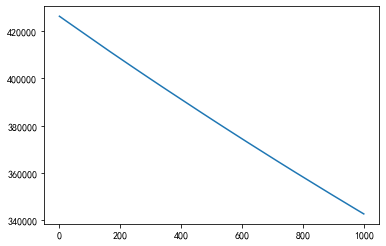

In [41]:
plt.plot(history.epoch,history.history.get('loss'))

#### 多层感知机

In [42]:
model= tf.keras.Sequential([tf.keras.layers.Dense(10,input_shape=(1,),activation = 'relu'),
          tf.keras.layers.Dense(1)]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='Adam',
             loss='mse',
)

In [44]:
history2 = model.fit(x2,y2,epochs=1000)

Epoch 1/1000
15/15 [==============================] - 0s 3ms/step - loss: 419911.8438
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 419635.0312
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 419357.1562
Epoch 4/1000
15/15 [==============================] - 0s 2ms/step - loss: 419070.3750
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 418780.7500
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 418486.3750
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 418164.2812
Epoch 8/1000
15/15 [==============================] - 0s 4ms/step - loss: 417854.5312
Epoch 9/1000
15/15 [==============================] - 0s 3ms/step - loss: 417519.4375
Epoch 10/1000
15/15 [==============================] - 0s 3ms/step - loss: 417171.8750
Epoch 11/1000
15/15 [==============================] - 0s 3ms/step - loss: 416818.5000
Epoch 12/1000
15/15 [==============================]

15/15 [==============================] - 0s 2ms/step - loss: 331963.9375
Epoch 96/1000
15/15 [==============================] - 0s 3ms/step - loss: 330370.7188
Epoch 97/1000
15/15 [==============================] - 0s 2ms/step - loss: 328825.3438
Epoch 98/1000
15/15 [==============================] - 0s 2ms/step - loss: 327179.8125
Epoch 99/1000
15/15 [==============================] - 0s 2ms/step - loss: 325634.8125
Epoch 100/1000
15/15 [==============================] - 0s 2ms/step - loss: 323999.2500
Epoch 101/1000
15/15 [==============================] - 0s 2ms/step - loss: 322428.1875
Epoch 102/1000
15/15 [==============================] - 0s 2ms/step - loss: 320785.7500
Epoch 103/1000
15/15 [==============================] - 0s 2ms/step - loss: 319197.0938
Epoch 104/1000
15/15 [==============================] - 0s 3ms/step - loss: 317593.3125
Epoch 105/1000
15/15 [==============================] - 0s 2ms/step - loss: 315986.1562
Epoch 106/1000
15/15 [=============================

15/15 [==============================] - 0s 3ms/step - loss: 193104.4062
Epoch 189/1000
15/15 [==============================] - 0s 3ms/step - loss: 192002.6719
Epoch 190/1000
15/15 [==============================] - 0s 3ms/step - loss: 190892.6406
Epoch 191/1000
15/15 [==============================] - 0s 5ms/step - loss: 189704.6250
Epoch 192/1000
15/15 [==============================] - 0s 2ms/step - loss: 188632.8750
Epoch 193/1000
15/15 [==============================] - 0s 2ms/step - loss: 187503.0156
Epoch 194/1000
15/15 [==============================] - 0s 2ms/step - loss: 186366.5781
Epoch 195/1000
15/15 [==============================] - 0s 2ms/step - loss: 185307.4688
Epoch 196/1000
15/15 [==============================] - 0s 2ms/step - loss: 184202.6250
Epoch 197/1000
15/15 [==============================] - 0s 2ms/step - loss: 183162.6875
Epoch 198/1000
15/15 [==============================] - 0s 2ms/step - loss: 182095.0156
Epoch 199/1000
15/15 [=========================

Epoch 281/1000
15/15 [==============================] - 0s 4ms/step - loss: 131188.9531
Epoch 282/1000
15/15 [==============================] - 0s 6ms/step - loss: 130930.2109
Epoch 283/1000
15/15 [==============================] - 0s 4ms/step - loss: 130715.4766
Epoch 284/1000
15/15 [==============================] - 0s 3ms/step - loss: 130483.4766
Epoch 285/1000
15/15 [==============================] - 0s 3ms/step - loss: 130251.1875
Epoch 286/1000
15/15 [==============================] - 0s 3ms/step - loss: 130050.6953
Epoch 287/1000
15/15 [==============================] - 0s 2ms/step - loss: 129882.5547
Epoch 288/1000
15/15 [==============================] - 0s 2ms/step - loss: 129617.6016
Epoch 289/1000
15/15 [==============================] - 0s 2ms/step - loss: 129451.1875
Epoch 290/1000
15/15 [==============================] - 0s 2ms/step - loss: 129267.0078
Epoch 291/1000
15/15 [==============================] - 0s 2ms/step - loss: 129054.9297
Epoch 292/1000
15/15 [==========

15/15 [==============================] - 0s 2ms/step - loss: 123579.9062
Epoch 375/1000
15/15 [==============================] - 0s 2ms/step - loss: 123573.0625
Epoch 376/1000
15/15 [==============================] - 0s 3ms/step - loss: 123544.5234
Epoch 377/1000
15/15 [==============================] - 0s 3ms/step - loss: 123524.5391
Epoch 378/1000
15/15 [==============================] - 0s 2ms/step - loss: 123510.1641
Epoch 379/1000
15/15 [==============================] - 0s 2ms/step - loss: 123495.2188
Epoch 380/1000
15/15 [==============================] - 0s 2ms/step - loss: 123493.4609
Epoch 381/1000
15/15 [==============================] - 0s 2ms/step - loss: 123466.1797
Epoch 382/1000
15/15 [==============================] - 0s 2ms/step - loss: 123458.1641
Epoch 383/1000
15/15 [==============================] - 0s 2ms/step - loss: 123431.8594
Epoch 384/1000
15/15 [==============================] - 0s 2ms/step - loss: 123416.4766
Epoch 385/1000
15/15 [=========================

15/15 [==============================] - 0s 2ms/step - loss: 122432.1328
Epoch 468/1000
15/15 [==============================] - 0s 3ms/step - loss: 122421.4219
Epoch 469/1000
15/15 [==============================] - 0s 3ms/step - loss: 122434.5391
Epoch 470/1000
15/15 [==============================] - 0s 3ms/step - loss: 122401.1875
Epoch 471/1000
15/15 [==============================] - 0s 2ms/step - loss: 122390.5938
Epoch 472/1000
15/15 [==============================] - 0s 2ms/step - loss: 122381.8750
Epoch 473/1000
15/15 [==============================] - 0s 2ms/step - loss: 122371.9531
Epoch 474/1000
15/15 [==============================] - 0s 2ms/step - loss: 122359.0469
Epoch 475/1000
15/15 [==============================] - 0s 2ms/step - loss: 122356.1641
Epoch 476/1000
15/15 [==============================] - 0s 2ms/step - loss: 122352.6719
Epoch 477/1000
15/15 [==============================] - 0s 2ms/step - loss: 122328.0703
Epoch 478/1000
15/15 [=========================

15/15 [==============================] - 0s 3ms/step - loss: 121584.3906
Epoch 560/1000
15/15 [==============================] - 0s 5ms/step - loss: 121573.6406
Epoch 561/1000
15/15 [==============================] - 0s 3ms/step - loss: 121569.6875
Epoch 562/1000
15/15 [==============================] - 0s 3ms/step - loss: 121570.3281
Epoch 563/1000
15/15 [==============================] - 0s 3ms/step - loss: 121550.4766
Epoch 564/1000
15/15 [==============================] - 0s 3ms/step - loss: 121568.0781
Epoch 565/1000
15/15 [==============================] - 0s 3ms/step - loss: 121530.8672
Epoch 566/1000
15/15 [==============================] - 0s 2ms/step - loss: 121531.1172
Epoch 567/1000
15/15 [==============================] - 0s 2ms/step - loss: 121523.8125
Epoch 568/1000
15/15 [==============================] - 0s 2ms/step - loss: 121525.4375
Epoch 569/1000
15/15 [==============================] - 0s 2ms/step - loss: 121500.0781
Epoch 570/1000
15/15 [=========================

15/15 [==============================] - 0s 3ms/step - loss: 120972.0703
Epoch 653/1000
15/15 [==============================] - 0s 3ms/step - loss: 120972.2422
Epoch 654/1000
15/15 [==============================] - 0s 3ms/step - loss: 120957.4062
Epoch 655/1000
15/15 [==============================] - 0s 3ms/step - loss: 120955.4141
Epoch 656/1000
15/15 [==============================] - 0s 3ms/step - loss: 120964.3047
Epoch 657/1000
15/15 [==============================] - 0s 3ms/step - loss: 120944.8281
Epoch 658/1000
15/15 [==============================] - 0s 3ms/step - loss: 120935.0156
Epoch 659/1000
15/15 [==============================] - 0s 3ms/step - loss: 120933.9609
Epoch 660/1000
15/15 [==============================] - 0s 3ms/step - loss: 120937.1719
Epoch 661/1000
15/15 [==============================] - 0s 3ms/step - loss: 120934.7891
Epoch 662/1000
15/15 [==============================] - 0s 2ms/step - loss: 120918.4844
Epoch 663/1000
15/15 [=========================

15/15 [==============================] - 0s 2ms/step - loss: 120542.4219
Epoch 746/1000
15/15 [==============================] - 0s 3ms/step - loss: 120544.7266
Epoch 747/1000
15/15 [==============================] - 0s 2ms/step - loss: 120545.4141
Epoch 748/1000
15/15 [==============================] - 0s 2ms/step - loss: 120530.1953
Epoch 749/1000
15/15 [==============================] - 0s 2ms/step - loss: 120537.7656
Epoch 750/1000
15/15 [==============================] - 0s 2ms/step - loss: 120523.3984
Epoch 751/1000
15/15 [==============================] - 0s 2ms/step - loss: 120526.0859
Epoch 752/1000
15/15 [==============================] - 0s 2ms/step - loss: 120527.5078
Epoch 753/1000
15/15 [==============================] - 0s 2ms/step - loss: 120518.4531
Epoch 754/1000
15/15 [==============================] - 0s 2ms/step - loss: 120519.1953
Epoch 755/1000
15/15 [==============================] - 0s 2ms/step - loss: 120517.8906
Epoch 756/1000
15/15 [=========================

Epoch 838/1000
15/15 [==============================] - 0s 2ms/step - loss: 120272.3516
Epoch 839/1000
15/15 [==============================] - 0s 2ms/step - loss: 120277.4531
Epoch 840/1000
15/15 [==============================] - 0s 2ms/step - loss: 120267.2188
Epoch 841/1000
15/15 [==============================] - 0s 2ms/step - loss: 120263.3906
Epoch 842/1000
15/15 [==============================] - 0s 2ms/step - loss: 120264.7188
Epoch 843/1000
15/15 [==============================] - 0s 2ms/step - loss: 120264.5312
Epoch 844/1000
15/15 [==============================] - 0s 2ms/step - loss: 120263.5156
Epoch 845/1000
15/15 [==============================] - 0s 2ms/step - loss: 120258.9297
Epoch 846/1000
15/15 [==============================] - 0s 3ms/step - loss: 120260.4062
Epoch 847/1000
15/15 [==============================] - 0s 2ms/step - loss: 120252.8516
Epoch 848/1000
15/15 [==============================] - 0s 2ms/step - loss: 120258.5625
Epoch 849/1000
15/15 [==========

15/15 [==============================] - 0s 2ms/step - loss: 120100.4375
Epoch 932/1000
15/15 [==============================] - 0s 2ms/step - loss: 120108.3359
Epoch 933/1000
15/15 [==============================] - 0s 2ms/step - loss: 120099.4609
Epoch 934/1000
15/15 [==============================] - 0s 4ms/step - loss: 120114.8750
Epoch 935/1000
15/15 [==============================] - 0s 2ms/step - loss: 120096.2188
Epoch 936/1000
15/15 [==============================] - 0s 3ms/step - loss: 120091.9219
Epoch 937/1000
15/15 [==============================] - 0s 3ms/step - loss: 120088.9688
Epoch 938/1000
15/15 [==============================] - 0s 2ms/step - loss: 120091.5469
Epoch 939/1000
15/15 [==============================] - 0s 2ms/step - loss: 120087.9766
Epoch 940/1000
15/15 [==============================] - 0s 2ms/step - loss: 120086.8125
Epoch 941/1000
15/15 [==============================] - 0s 2ms/step - loss: 120084.8984
Epoch 942/1000
15/15 [=========================

In [45]:
model.predict([0,1,5,10,20])

array([[ 162.08153],
       [ 240.73843],
       [ 555.3661 ],
       [ 948.6507 ],
       [1735.2198 ]], dtype=float32)

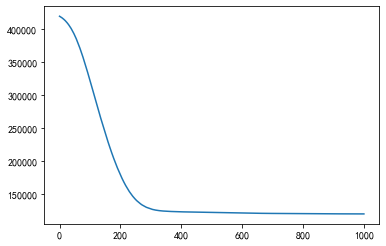

In [46]:
plt.plot(history2.epoch,history2.history.get('loss'))

## 论文题目与关键词

In [47]:
df['title']

0            多服务台可同时服务同一顾客可修系统的研究
1            动态EWMA中位值控制图的理论与应用研究
2      带有伪故障的Geo/Geo/1离散时间排队系统的研究
3               部件相依的多状态复杂系统可靠性分析
4               我国农业碳生产率测定及影响因素探究
                  ...            
468             基于SMIW分析范式的人才集聚研究
469              节能背景下安徽省产业结构调整研究
470               教育对农村居民幸福感的影响研究
471              中美股市动态相关性及驱动因素分析
472               四川省工业电力需求影响因素分析
Name: title, Length: 473, dtype: object

In [48]:
import jieba
title_fenci = []
for line in df.title:
    word_fenci = jieba.lcut(line)
    title_fenci.append(word_fenci)
title_fenci[0]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\leozhou\AppData\Local\Temp\jieba.cache
Loading model cost 1.061 seconds.
Prefix dict has been built successfully.


['多', '服务台', '可', '同时', '服务', '同一', '顾客', '可修', '系统', '的', '研究']

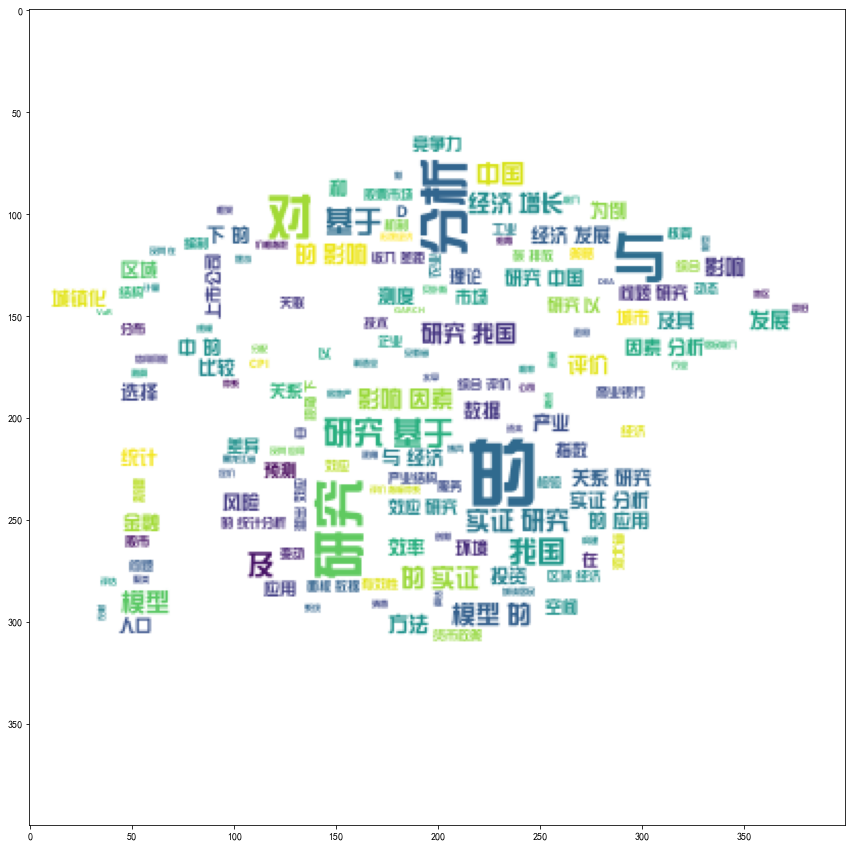

In [49]:
import wordcloud                                                                                #导入词云库
import PIL
import re

fig = plt.figure()
fig.set_size_inches(28,15)                                                                      #设置画布大小       

image1 = PIL.Image.open(r'D:\datasets\graph\词云背景.jpg')                                      #导入图片

MASK = np.array(image1)
WC = wordcloud.WordCloud(font_path = 'C:\\Windows\\Fonts\\HGZY_CNKI.TTF',
                         max_words=150,mask = MASK,height= 1000,
                         width=1500,background_color='white',repeat=False,mode='RGBA')        #设置词云图对象属性
st1 = re.sub('[，。、“”‘ ’——]','',str(title_fenci))                                      #使用正则表达式将符号替换掉。
conten = ' '.join(jieba.lcut(st1))                                                             #此处分词之间要有空格隔开
con = WC.generate(conten)
plt.imshow(con)

In [50]:
df['keyword']

0                多对一,备用服务台,矩阵几何解,费用模型,可变到达率
1        EWMA,中位值控制图,可变样本容量,可变抽样区间,ATS,ANOS
2                离散时间排队,多重休假,矩阵几何解,伪故障,拟生灭链
3          相依,多重延误放假,修理设备可更换,多状态,补充变量法,几何过程
4          农业碳生产率,碳排放,数据包络分析(DEA),Tobit回归分析
                       ...                 
468                      人才集聚,统计模型,人才集聚预警机制
469    节能降耗,产业结构,全要素能源效率,面板数据模型,数据包络分析(DEA)
470           居民幸福感,受教育程度,经济满意度,工作满意度,社会满意度
471             中美股市,相关性,GARCH-BEKK模型,VAR模型
472               四川省,工业电力需求,工业经济发展,虚拟变量,协整
Name: keyword, Length: 473, dtype: object

In [51]:
import jieba
keyword_fenci = []
for line in df.keyword:
    word_fenci1 = jieba.lcut(line)
    keyword_fenci.append(word_fenci1)
keyword_fenci[0]

['多',
 '对',
 '一',
 ',',
 '备用',
 '服务台',
 ',',
 '矩阵',
 '几何',
 '解',
 ',',
 '费用',
 '模型',
 ',',
 '可变',
 '到达',
 '率']

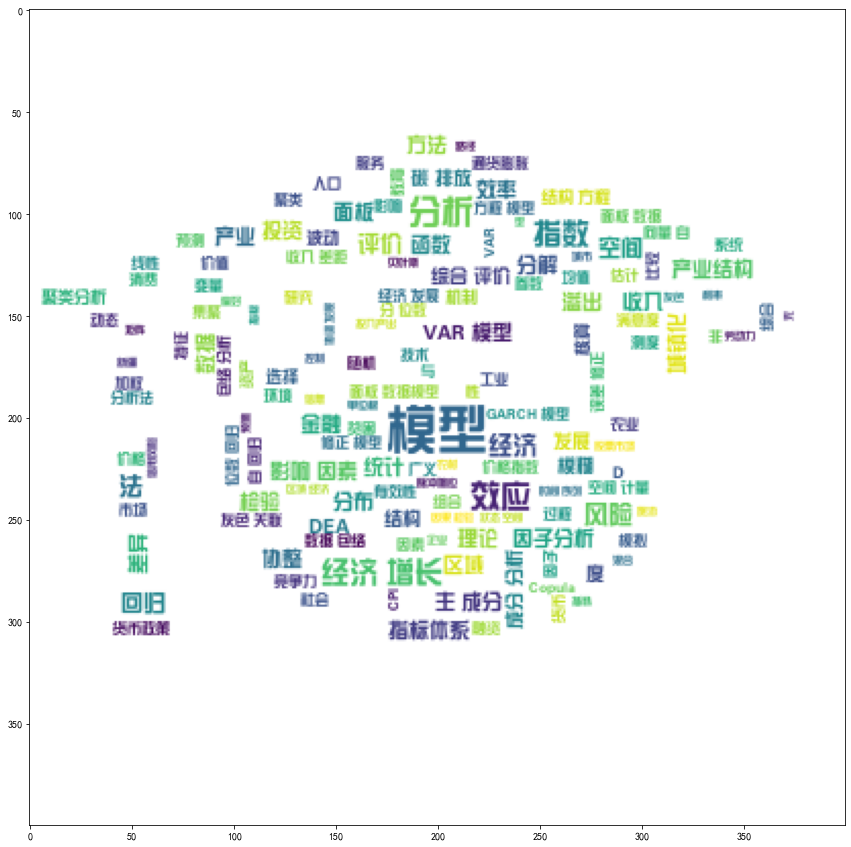

In [52]:
import wordcloud 
import PIL
import re

fig = plt.figure()
fig.set_size_inches(28,15)                                                      #设置画布大小       

image1 = PIL.Image.open(r'D:\datasets\graph\词云背景.jpg')                      #导入图片

MASK = np.array(image1)
WC = wordcloud.WordCloud(font_path = 'C:\\Windows\\Fonts\\HGZY_CNKI.TTF',
                         max_words=150,mask = MASK,height= 1000,width=1500,
                         background_color='white',repeat=False,mode='RGBA')    #设置词云图对象属性
st2 = re.sub('[，。、“”‘ ’；]','',str(keyword_fenci))                       #使用正则表达式将符号替换掉。
conten = ' '.join(jieba.lcut(st2))                                              #此处分词之间要有空格隔开
con2 = WC.generate(conten)
plt.imshow(con2)